In [2]:
# Import necessary Python packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [18]:
# User-defined parameters
num_stations = 3

# Known earthquake hypocenter (true location)
true_hypocenter = (100,100)

# Wave velocity (km/s)
velocity = 5.0

# Initial guess for the earthquake location
initial_guess = (40, 40)

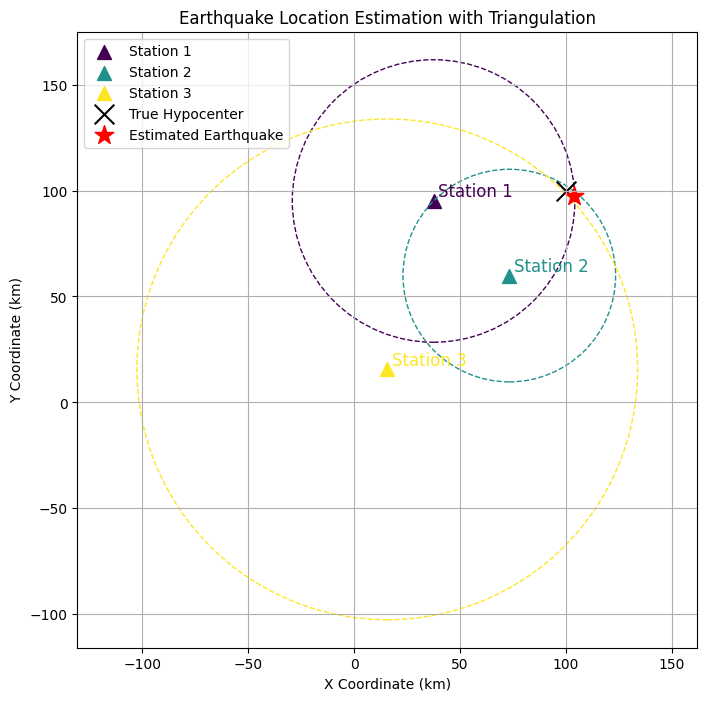

True Earthquake Location: (100, 100)
Estimated Earthquake Location: [103.71891662  97.41756797]


In [25]:
# Generate random station locations within (0,0) to (100,100)
np.random.seed(42)
station_coords = np.random.uniform(0, 100, (num_stations, 2))
station_names = [f"Station {i+1}" for i in range(num_stations)]
stations = dict(zip(station_names, station_coords))

# Simulate arrival times with some error
arrival_time_values = np.linalg.norm(station_coords - true_hypocenter, axis=1) / velocity
arrival_time_values += np.random.normal(0, 0.5, size=num_stations)  # Adding noise
arrival_times = dict(zip(station_names, arrival_time_values))

# Compute radii for circles
distances = arrival_time_values * velocity

# Define objective function to minimize (least squares difference)
def objective_function(epicenter):
    x, y = epicenter
    predicted_times = np.linalg.norm(station_coords - np.array([x, y]), axis=1) / velocity
    return np.sum((predicted_times - arrival_time_values) ** 2)

# Perform minimization
result = minimize(objective_function, initial_guess)
earthquake_location = result.x

# Generate unique colors for stations
colors = plt.cm.viridis(np.linspace(0, 1, num_stations))
color_dict = dict(zip(station_names, colors))

# Visualization
plt.figure(figsize=(8, 8))
for (name, coord, radius, color) in zip(station_names, station_coords, distances, colors):
    plt.scatter(*coord, marker='^', label=name, s=100, color=color)
    plt.text(coord[0] + 2, coord[1] + 2, name, fontsize=12, color=color)
    circle = plt.Circle(coord, radius, color=color, fill=False, linestyle='dashed')
    plt.gca().add_patch(circle)

plt.scatter(*true_hypocenter, color='black', marker='x', s=200, label='True Hypocenter')
plt.scatter(*earthquake_location, color='red', marker='*', s=200, label='Estimated Earthquake')
plt.xlabel("X Coordinate (km)")
plt.ylabel("Y Coordinate (km)")
plt.title("Earthquake Location Estimation with Triangulation")
plt.legend()
plt.grid()
plt.axis("equal")
plt.show()

print(f"True Earthquake Location: {true_hypocenter}")
print(f"Estimated Earthquake Location: {earthquake_location}")

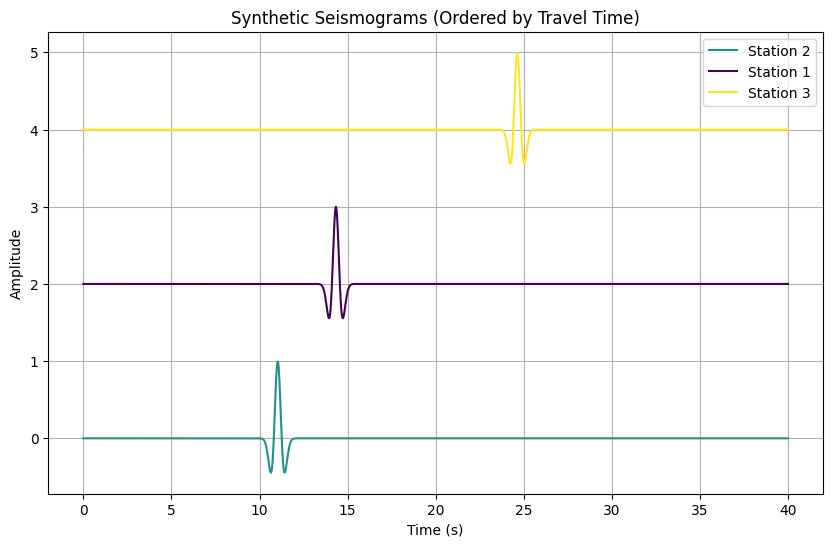

In [26]:

# Generate synthetic seismograms using Ricker wavelet
def ricker_wavelet(t, f=1.0):
    a = (np.pi * f * (t - 1.0)) ** 2
    return (1 - 2 * a) * np.exp(-a)

# Sort stations by arrival time and plot
sorted_stations = sorted(arrival_times.items(), key=lambda x: x[1])

time = np.linspace(0, 40, 1000)
plt.figure(figsize=(10, 6))
for i, (name, arrival_time) in enumerate(sorted_stations):
    plt.plot(time, ricker_wavelet(time - arrival_time) + i * 2, label=name, color=color_dict[name])

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Synthetic Seismograms (Ordered by Travel Time)")
plt.legend()
plt.grid()
plt.show()